## Step 1: Import Libraries
We'll start by importing the necessary libraries.

In [6]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Load and Preprocess Data
We need a dataset for face recognition. For this example, we will use a sample dataset. In practice, you can use your own dataset.
Let's assume the dataset is organized in the following structure:
```
data/
    train/
        person1/
            img1.jpg
            img2.jpg
            ...
        person2/
            img1.jpg
            img2.jpg
            ...
        ...
    validation/
        person1/
            img1.jpg
            img2.jpg
            ...
        person2/
            img1.jpg
            img2.jpg
            ...
        ...
```

In [7]:
# Directory paths
train_dir = 'data/train'
validation_dir = 'data/validation'

# Data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(224, 224), 
                                                    batch_size=32, 
                                                    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(validation_dir, 
                                                       target_size=(224, 224), 
                                                       batch_size=32, 
                                                       class_mode='categorical')

Found 130 images belonging to 4 classes.
Found 25 images belonging to 4 classes.


## Step 3: Build the Model using Transfer Learning
We will use the VGG16 model pretrained on ImageNet and add our own classification layers on top.

In [8]:
# Load the VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Combine the base model with the custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Step 4: Train the Model
Now we will train the model using the training data and validate it using the validation data.

In [ ]:
# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    validation_steps=validation_generator.samples // validation_generator.batch_size,
                    epochs=10,
                    validation_data=validation_generator)

Epoch 1/10
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 757ms/step - accuracy: 0.2366 - loss: 1.3604

## Step 5: Evaluate the Model
After training, we can evaluate the model performance on the validation data.

In [5]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step - accuracy: 0.6294 - loss: 0.9526
Validation Loss: 0.9602216482162476
Validation Accuracy: 0.6315789222717285


## Step 6: Visualize Training History
Let's plot the training and validation accuracy and loss over epochs.

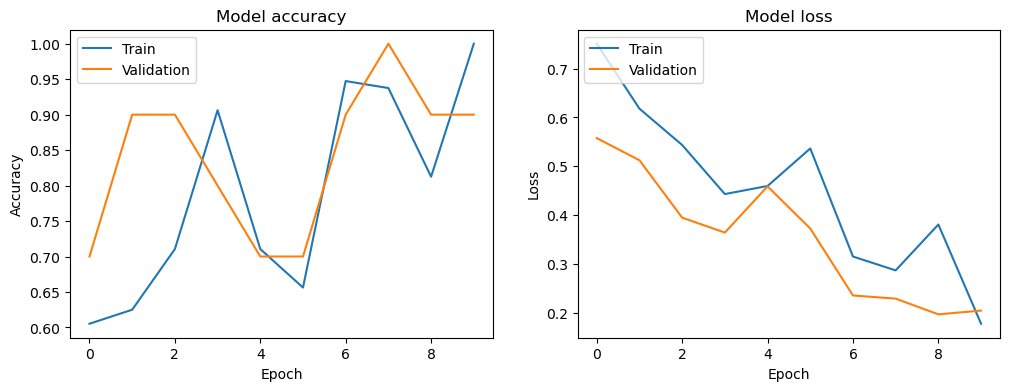

In [7]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## Conclusion
We have successfully built a face recognition model using TensorFlow and transfer learning.